Optimization terminated successfully.
         Current function value: 0.595958
         Iterations: 41
         Function evaluations: 77


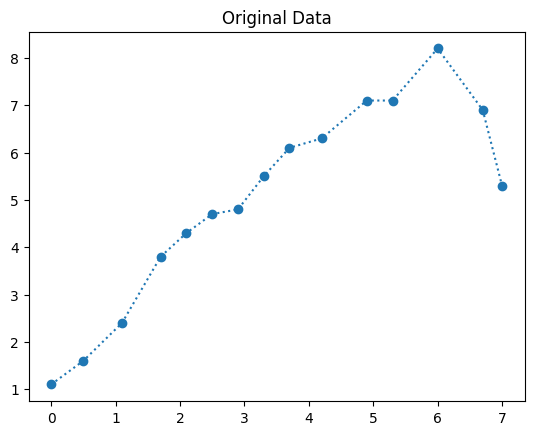

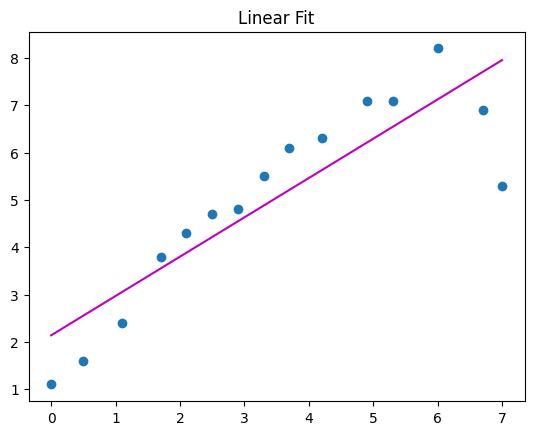

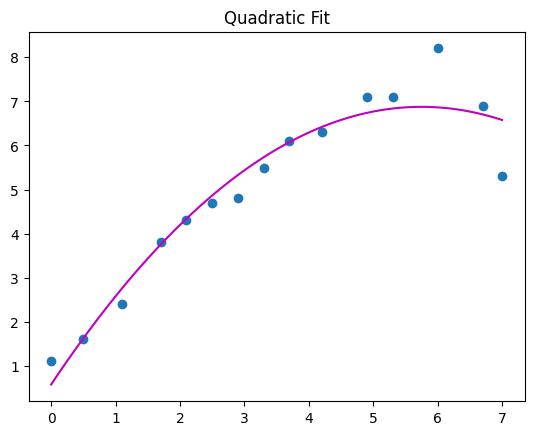

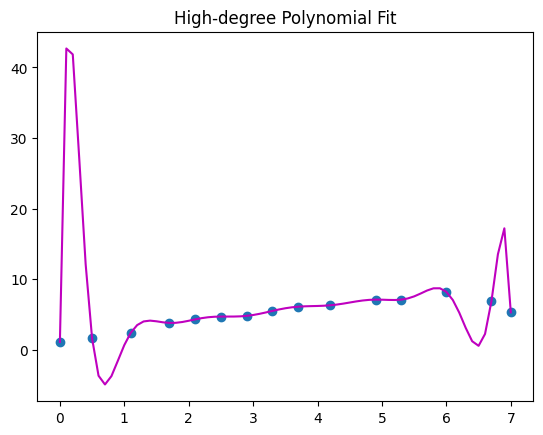

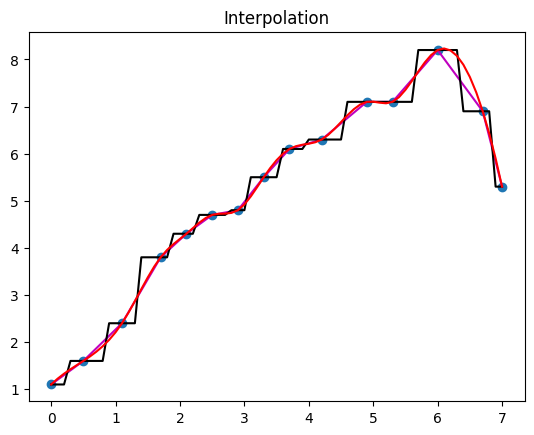

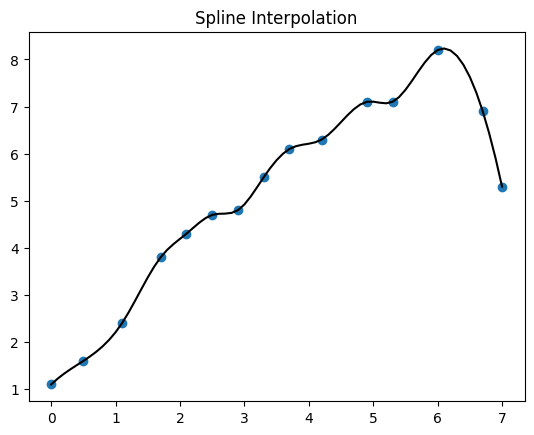

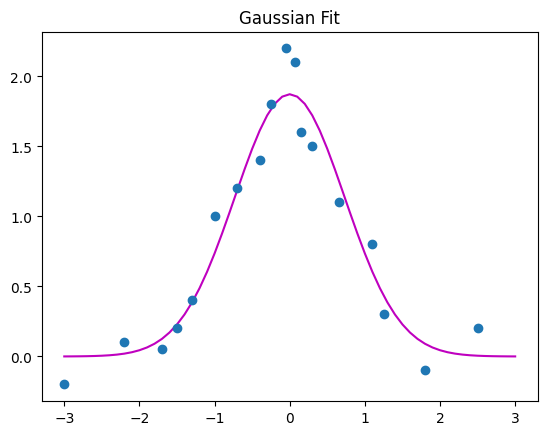

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fmin
from scipy.interpolate import interp1d, splev, splrep

# Load data
linefit = np.loadtxt('linefit.dat')
x = linefit[:, 0]
y = linefit[:, 1]

# Plot original data
plt.figure(1)
plt.plot(x, y, 'o:')
plt.title('Original Data')

# Linear fit
pcoeff = np.polyfit(x, y, 1)
xp = np.arange(0, 7.1, 0.1)
yp = np.polyval(pcoeff, xp)
plt.figure(2)
plt.plot(x, y, 'o', xp, yp, 'm')
plt.title('Linear Fit')

# Quadratic fit
pcoeff2 = np.polyfit(x, y, 2)
yp2 = np.polyval(pcoeff2, xp)
plt.figure(3)
plt.plot(x, y, 'o', xp, yp2, 'm')
plt.title('Quadratic Fit')

# Quadratic fit error
yp3 = np.polyval(pcoeff2, x)
n = len(yp3)
E2 = np.sqrt(np.sum(np.abs(yp3 - y)**2) / n)

# High-degree polynomial fit
n = len(x) - 1
pcoeffn = np.polyfit(x, y, n)
ypn = np.polyval(pcoeffn, xp)
plt.figure(4)
plt.plot(x, y, 'o', xp, ypn, 'm')
plt.title('High-degree Polynomial Fit')

# Interpolation
yint = interp1d(x, y)(xp)
yint1 = interp1d(x, y, kind='linear')(xp)
yint2 = interp1d(x, y, kind='nearest')(xp)
yint3 = interp1d(x, y, kind='cubic')(xp)
plt.figure(5)
plt.plot(x, y, 'o', xp, yint, 'm', xp, yint2, 'k', xp, yint3, 'r')
plt.title('Interpolation')

# Spline interpolation
yspline = splev(xp, splrep(x, y))
plt.figure(6)
plt.plot(x, y, 'o', xp, yspline, 'k')
plt.title('Spline Interpolation')

# Gaussian fit using fmin
def gauss_fit(x0):
    # Load data
    gaussfit = np.loadtxt('gaussfit.dat')
    x = gaussfit[:, 0]
    y = gaussfit[:, 1]

    # Calculate error
    E = np.sum((x0[0] * np.exp(-x0[1] * x**2) - y)**2)

    return E

coeff = fmin(gauss_fit, [1, 1])

xga = np.arange(-3, 3.1, 0.1)
a, b = coeff[0], coeff[1]
yga = a * np.exp(-b * xga**2)
plt.figure(7)
plt.plot(xga, yga, 'm')
plt.title('Gaussian Fit')

# Load additional data for Gaussian fit comparison
gaussfit = np.loadtxt('gaussfit.dat')
x2 = gaussfit[:, 0]
y2 = gaussfit[:, 1]
plt.plot(x2, y2, 'o')

# Show all plots
plt.show()
